In [28]:
# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

- `torch.utils.data.DataLoader` : 데이터를 파이썬 iterable로써 접근할 수 있게 해주는 클래스
- `torch.utils.data.Dataset` : PyTorch에 내장된 다양한 고품질 데이터셋을 이용하게 해주는 클래스

개별 데이터셋은 아래 패키지에서 확인 가능하며, 계속해서 추가될 예정임
- [torchvision](https://pytorch.org/vision/stable/datasets.html)
- [torchaudio](https://pytorch.org/audio/stable/datasets.html)
- [torchtext](https://pytorch.org/text/stable/datasets.html)

이번 레시피에서는 `torchaudio.datasets.YESNO` 데이터셋을 살펴보면서 PyTorch `Dataset`에서 PyTorch `DataLoader`로 데이터를 효과적이고 효율적으로 불러오는 방법을 살펴볼 것임. 초기 설정(setup)을 시작하기 전에, 데이터셋이 포함된 `torchaudio` 패키지를 설치해야 함

In [2]:
# pip install torchaudio

# 단계(steps)
1. 데이터를 불러오는데 필요한 라이브러리 import하기
2. 데이터 접근하기
3. 데이터 불러오기
4. 데이터 순회하기
5. [선택 사항] 데이터 시각화하기

## 데이터를 불러오는데 필요한 라이브러리 import하기

In [3]:
import torch
import torchaudio

## 데이터에 접근하기
- `torchaudio`의 YesNo 데이터셋은 한 사람이 히브리어로 yes 혹은 no를 녹음한 오디오 클립 60개로 구성됨. 오디오 클립 각각의 길이는 단어 8개
- `torchaudio.datasets.YESNO` 클래스를 사용하여 YESNO 데이터셋을 생성함
- [torchaudio](https://pytorch.org/audio/stable/datasets.html)

In [18]:
# transform, target_transform parameter가 없다고 하는 것 보니 이젠 지원 안하는 듯..?
torchaudio.datasets.YESNO(
    root='./',
    url = 'http://www.openslr.org/resources/1/waves_yesno.tar.gz',
    folder_in_archive = 'waves_yesno', # 데이터셋의 최상위 디렉토리(default:'ARCTIC')
    download = True, # root에 dataset이 없으면 다운로드 받기(default:'False')
)

- 각각의 데이터 항목(item)은 튜플 형태(waveform:파형, sample_rate:샘플 속도, labels:라벨)를 가짐
- YesNo 데이터셋을 불러올 때 `root` 매개변수는 꼭 지정해줘야 함
    - `root`는 학습(train) 및 테스트(test) dataset이 존재하는 위치를 가리켜야 함
    - 그 외의 매개변수는 선택사항임..-> 이라고 하는데 초기에 download=True로 안해주니 에러 남

In [17]:
# YesNo 데이터 확인하기
# YesNo 안에 각각의 데이터 항목은 튜플 형태(파형, 샘플 속도, 라벨)를 가지며,
# 이때 labels는 0(no)과 1(yes)을 담은 리스트 형태로 되어 있음
yesno_data = torchaudio.datasets.YESNO('./', download=True)

# 실제 데이터에 접근해서 yesno_data의 형태를 확인하기
n = 3
waveform, sample_rate, labels = yesno_data[3]
print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

Waveform: tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -1.8311e-04,
          4.2725e-04,  6.7139e-04]])
Sample rate: 8000
Labels: [0, 0, 1, 0, 0, 0, 1, 0]


## 데이터 불러오기
- dataset에 접근했으니, 이제 dataset을 `torch.utils.data.DataLoader`로 넘겨줌
- `DataLoader`는 dataset을 sampler와 조합시켜 데이터셋을 순회할 수 있는 iterable을 만들어줌
- [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)
- [PyTorch 데이터로더 이해하기 - Part 1](https://blog.promedius.ai/pytorch_dataloader_1/)

In [33]:
data_loader = torch.utils.data.DataLoader(yesno_data, batch_size=1, shuffle=True)

## 1.4 데이터 순회하기
- `data_loader`를 이용해서 데이터를 순회할 수 있음
- 모델이 학습하려면 데이터를 순회할 수 있어야 함
- 아래 예시를 보면 `data_loader`안에 있는 각각의 데이터 항목이 파형, 샘플 속도, 라벨을 담은 텐서로 바뀌었음

In [42]:
for data in data_loader:
    print('Data: ', data)
    print('Waveform: {} \n Sample rate: {} \n Labels: {}'.format(data[0], data[1], data[2]))
    break

Data:  [tensor([[[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -2.3193e-03,
          -2.3804e-03, -1.5259e-03]]]), tensor([8000]), [tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0])]]
Waveform: tensor([[[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -2.3193e-03,
          -2.3804e-03, -1.5259e-03]]]) 
 Sample rate: tensor([8000]) 
 Labels: [tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0])]


## [선택 사항] 데이터 시각화하기
- `DataLoader`의 데이터를 시각화해서 더 자세히 확인하기

[[ 3.0517578e-05  6.1035156e-05  3.0517578e-05 ... -2.3193359e-03
  -2.3803711e-03 -1.5258789e-03]]


<Figure size 432x288 with 0 Axes>

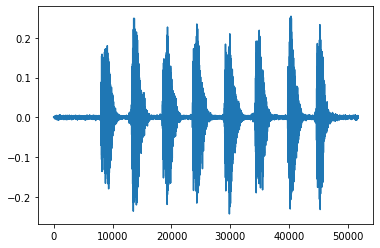

In [49]:
import matplotlib.pyplot as plt

print(data[0][0].numpy()) # 0번째 data의 waveform

plt.figure()
plt.plot(waveform.t().numpy()) # .numpy() : torch.Tensor -> numpy.ndarray로 변환